In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv')
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [3]:
raw_df.shape

(12032, 12)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [5]:
raw_df.describe()

,Price for 2
count,12032.000000
mean,397.611370
std,332.045938
min,40.000000
25%,200.000000
50%,300.000000
75%,450.000000
max,5000.000000


In [6]:
print(raw_df.columns)

Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features'],
      dtype='object')


In [7]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [8]:
raw_df['Delivery Rating'].value_counts()

None    5851
3.9     1383
3.8      701
4.0      570
3.7      559
4.1      468
3.6      465
4.2      401
3.5      314
4.3      277
3.4      259
3.3      189
4.4      128
3.2       93
3.1       79
3.0       63
4.5       55
2.9       39
2.8       26
4.6       24
2.7       19
2.6       17
2.5        9
0.3        8
2.4        7
1.8        5
2.2        5
2.0        5
2.3        5
4.7        4
2.1        2
1.5        1
1.6        1
Name: Delivery Rating, dtype: int64

In [24]:
raw_df[raw_df.duplicated()]

,ZOMATO_URL,NAME_OF_RESTAURANT,LOCATION,CUISINE,TOP_DISHES,PRICE_FOR_2,DINING_RATING,DINING_RATING_COUNT,DELIVERY_RATING,DELIVERY_RATING_COUNT,FEATURES


In [27]:
raw_df = raw_df.drop_duplicates()

In [26]:
zomato_df = raw_df.copy()
zomato_df.head()

,ZOMATO_URL,NAME_OF_RESTAURANT,LOCATION,CUISINE,TOP_DISHES,PRICE_FOR_2,DINING_RATING,DINING_RATING_COUNT,DELIVERY_RATING,DELIVERY_RATING_COUNT,FEATURES
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [28]:
raw_df.columns = raw_df.columns.str.strip().str.upper().str.replace(" ", "_")

In [32]:
print(raw_df.columns.tolist())

['ZOMATO_URL', 'NAME_OF_RESTAURANT', 'LOCATION', 'CUISINE', 'TOP_DISHES', 'PRICE_FOR_2', 'DINING_RATING', 'DINING_RATING_COUNT', 'DELIVERY_RATING', 'DELIVERY_RATING_COUNT', 'FEATURES']


In [33]:
print(raw_df['DINING_RATING'].describe())

count    6681.000000
mean        3.387756
std         0.558181
min         0.300000
25%         3.100000
50%         3.500000
75%         3.800000
max         4.900000
Name: DINING_RATING, dtype: float64


In [34]:
print(raw_df['DINING_RATING'].value_counts())

3.6    584
3.5    553
3.7    525
3.4    500
3.3    463
3.8    460
3.2    433
3.9    379
3.1    363
2.0    354
3.0    302
4.0    288
2.9    257
4.1    221
2.8    192
4.2    142
2.7    138
4.3    105
2.6     99
2.5     71
4.4     61
2.4     46
4.5     36
2.3     32
2.2     20
4.6     17
4.7     12
2.1     10
4.9      7
4.8      4
1.9      3
1.7      2
0.3      1
1.0      1
Name: DINING_RATING, dtype: int64


# Which restaurants have dining ratings higher than 4.5?

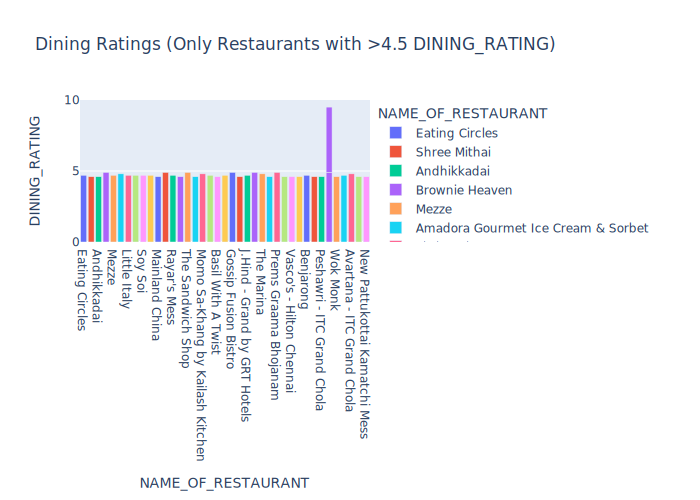

In [35]:
# Convert DINING_RATING to numeric (coerce errors to NaN), then drop rows with NaN
raw_df['DINING_RATING'] = pd.to_numeric(raw_df['DINING_RATING'], errors='coerce')
filtered_df = raw_df[raw_df['DINING_RATING'] > 4.5]

# Create the box plot
fig = px.bar(
    filtered_df,
    x='NAME_OF_RESTAURANT',
    y='DINING_RATING',
    title='Dining Ratings (Only Restaurants with >4.5 DINING_RATING)',  
    color='NAME_OF_RESTAURANT'
)
fig.show()

# Which are the top rated restaurants?

In [36]:
# Filter, sort, and get top 20
top_rated = raw_df[raw_df['DINING_RATING'] > 4.5].sort_values(by='DINING_RATING', ascending=False).head(20)

# Display restaurant name and rating
top_rated[['NAME_OF_RESTAURANT', 'DINING_RATING']]

,NAME_OF_RESTAURANT,DINING_RATING
184,Gossip Fusion Bistro,4.9
57,Brownie Heaven,4.9
320,Bombay Kulfi,4.9
219,Prems Graama Bhojanam,4.9
192,Kabab Corner,4.9
105,Bhangra,4.9
155,The Sandwich Shop,4.9
163,Momo Sa-Khang by Kailash Kitchen,4.8
443,Avartana - ITC Grand Chola,4.8
62,Amadora Gourmet Ice Cream & Sorbet,4.8


# List out the restaurants provide biriyani

In [38]:
biryani_df = zomato_df[zomato_df['CUISINE'].str.contains('Biryani', case=False, na=False)]

biryani_df.head()

,ZOMATO_URL,NAME_OF_RESTAURANT,LOCATION,CUISINE,TOP_DISHES,PRICE_FOR_2,DINING_RATING,DINING_RATING_COUNT,DELIVERY_RATING,DELIVERY_RATING_COUNT,FEATURES
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,NaN,Does not offer Dining,4.3,1061,['Home Delivery']


# What are the top 10 cuisines with the highest average Price for 2?

In [41]:
zomato_df['CUISINE'] = zomato_df['CUISINE'].astype(str)

# Remove brackets and single quotes, then split by comma
zomato_df['CUISINE'] = zomato_df['CUISINE'].str.strip("[]").str.replace("'", "", regex=False)
zomato_df['CUISINE'] = zomato_df['CUISINE'].str.split(',')

# Explode the list of cuisines into separate rows
cuisine_df = zomato_df.explode('CUISINE')

# Remove any leading/trailing whitespace
cuisine_df['CUISINE'] = cuisine_df['CUISINE'].str.strip()

# Calculate average price per cuisine
avg_price_by_cuisine = cuisine_df.groupby('CUISINE')['PRICE_FOR_2'].mean().sort_values(ascending=False)

# Show top 10 cuisines by average price
print(avg_price_by_cuisine.head(10))

CUISINE
Irish          2500.000000
Sushi          1942.857143
Moroccan       1875.000000
Indonesian     1800.000000
Spanish        1675.000000
French         1660.000000
Singaporean    1500.000000
European       1485.294118
Japanese       1444.230769
Bar Food       1407.142857
Name: PRICE_FOR_2, dtype: float64


# Which 15 cuisines have the highest average cost for two people, and how do they compare visually in terms of price?

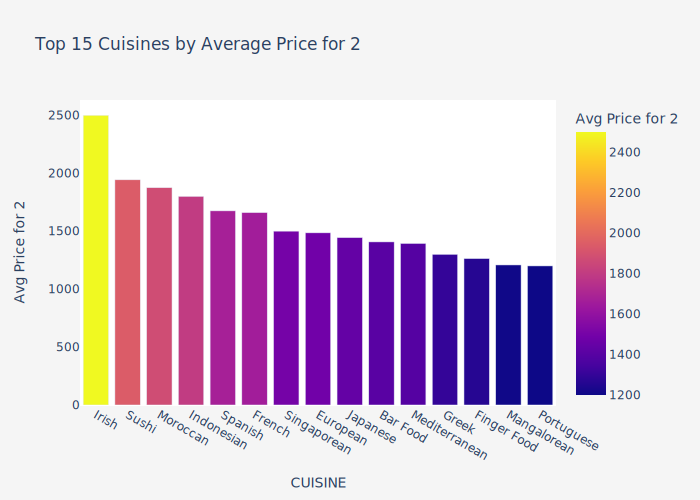

In [43]:
import plotly.express as px

top_avg_price = avg_price_by_cuisine.head(15).reset_index()
fig = px.bar(top_avg_price, x='CUISINE', y='PRICE_FOR_2', 
             title='Top 15 Cuisines by Average Price for 2',
             color='PRICE_FOR_2', 
             labels={'PRICE_FOR_2': 'Avg Price for 2'})

fig.update_layout(plot_bgcolor='white', paper_bgcolor='whitesmoke')
fig.show()

# Among restaurants with a dining rating above 4.5, how are the ratings distributed in terms of percentage share?

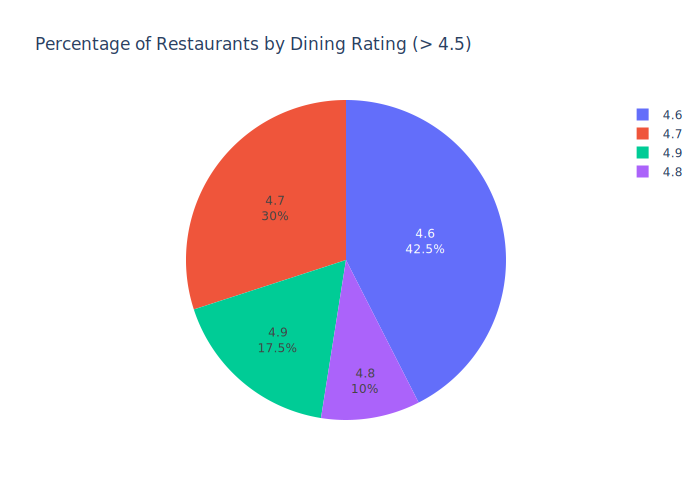

In [44]:
raw_df['DINING_RATING'] = pd.to_numeric(raw_df['DINING_RATING'], errors='coerce')

# Filter for ratings > 4.5
filtered_df = raw_df[raw_df['DINING_RATING'] > 4.5]

# Count how many restaurants fall into each high DINING_RATING
rating_type_df = filtered_df['DINING_RATING'].value_counts().reset_index()
rating_type_df.columns = ['DINING_RATING', 'COUNT']

# Create the pie chart
fig = px.pie(
    rating_type_df,
    names='DINING_RATING',
    values='COUNT',
    color='DINING_RATING',
    title='Percentage of Restaurants by Dining Rating (> 4.5)'
).update_traces(textposition='inside', textinfo='percent+label')

fig.show()

# What is the distribution of dining ratings across different cuisines for restaurants with a rating higher than 4?

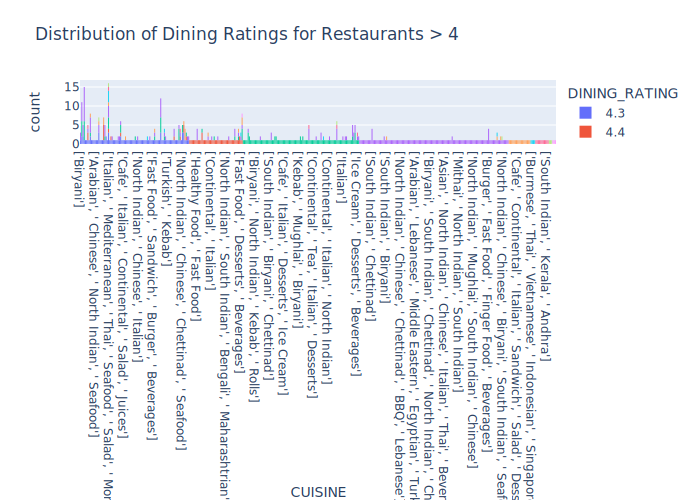

In [45]:
highest_rated_df = raw_df[raw_df['DINING_RATING'] > 4]

# Step 3: Optional — pick top 20 by rating
top20 = highest_rated_df.sort_values(by='DINING_RATING', ascending=False).head(20)

# Step 4: Plot
fig = px.histogram(
    highest_rated_df,
    x='CUISINE',
    color='DINING_RATING',  # Optional: shows distribution by cuisine
    nbins=5,  # Number of bins
    title='Distribution of Dining Ratings for Restaurants > 4'
)
fig.show()

# Which 25 locations have the highest number of restaurants, and what is the average price for two in each of those locations?

In [54]:
# Grouping by LOCATION (instead of REGION)
TOP_DISHES = raw_df.groupby(by='LOCATION').agg({
    'NAME_OF_RESTAURANT': 'count',  # Count of restaurants by location
    'PRICE_FOR_2': 'mean'  # Mean price for each location
}).rename(columns={'NAME_OF_RESTAURANT': 'COUNT OF RESTAURANTS',
                   'PRICE_FOR_2': 'AVERAGE PRICE'})

# Sorting by the count of restaurants and taking top 25
TOP_DISHES = TOP_DISHES.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)

# Display the top 25 locations with the highest number of restaurants
TOP_DISHES.head()

,COUNT OF RESTAURANTS,AVERAGE PRICE
LOCATION,,
Porur,418,344.497608
Velachery,372,364.112903
Ambattur,334,315.089820
T. Nagar,315,375.079365
Perungudi,288,360.590278


# How do the top 25 locations with the most restaurants compare in terms of their average price for two people?

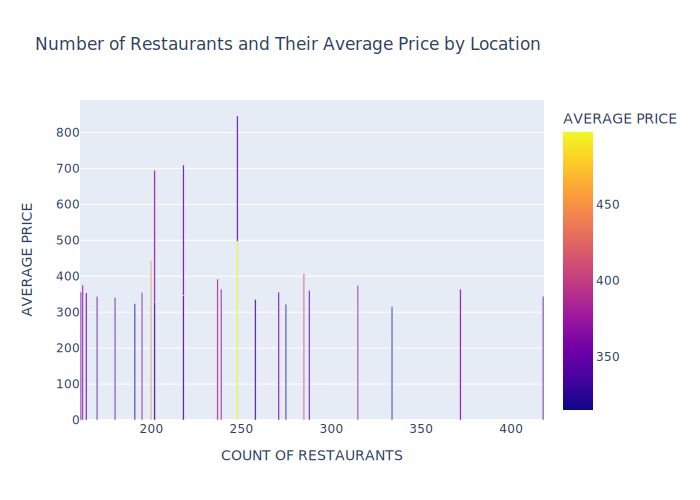

In [55]:
fig = px.bar(
    TOP_DISHES,
    x='COUNT OF RESTAURANTS',
    y='AVERAGE PRICE',
    color='AVERAGE PRICE',  # Color by average price
    title='Number of Restaurants and Their Average Price by Location'
)

fig.show()

# What is the average price for two for each cuisine type among restaurants with a dining rating higher than 4.5?

In [56]:
filtered_df = raw_df[raw_df['DINING_RATING'] > 4.5]

# Group by CUISINE and DINING_RATING, and calculate the average PRICE_FOR_2
price_rating_df = filtered_df.groupby(['CUISINE', 'DINING_RATING'])['PRICE_FOR_2'].mean().reset_index()

# Display the result
price_rating_df

,CUISINE,DINING_RATING,PRICE_FOR_2
0,"['Arabian', ' Mughlai', ' North Indian', ' Bir...",4.6,1000.000000
1,"['Asian', ' Chinese', ' Middle Eastern']",4.6,1200.000000
2,"['Bakery', ' Desserts', ' Beverages']",4.9,350.000000
3,"['Biryani', ' North Indian', ' Kebab']",4.6,400.000000
4,"['Burmese', ' Thai', ' Vietnamese', ' Indonesi...",4.7,1400.000000
5,"['Chinese', ' Asian', ' Sushi', ' Japanese', '...",4.6,1800.000000
6,"['Desserts', ' Beverages']",4.6,400.000000
7,"['Desserts', ' Ice Cream']",4.8,500.000000
8,"['European', ' Continental', ' Italian', ' Nor...",4.6,1650.000000
9,"['Fast Food', ' Desserts', ' Beverages']",4.7,150.000000


# How does the average price for two vary across different locations?

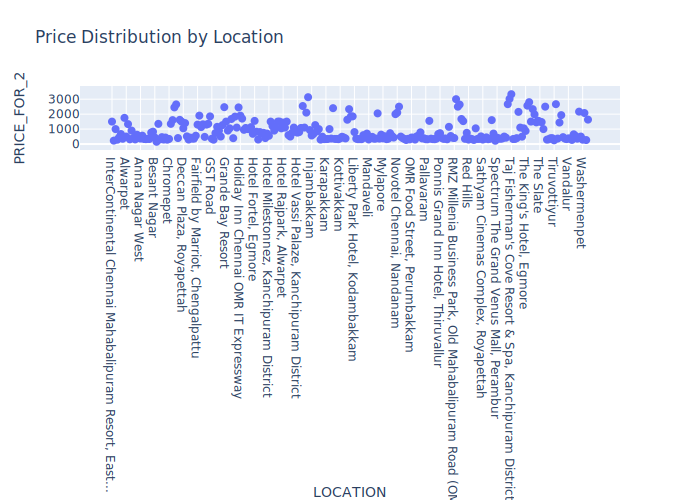

In [57]:
region_price_df = raw_df.groupby('LOCATION')['PRICE_FOR_2'].mean().reset_index()

# Check the first few rows of the result
region_price_df.head()

fig = px.scatter(
    region_price_df, 
    x="LOCATION",  
    y="PRICE_FOR_2",  
    title="Price Distribution by Location",
)

# Update marker size
fig.update_traces(marker_size=8)

# Show the plot
fig.show()